In [ ]:
from numpy import unique,argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)=load_data()
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1], x_train.shape[2],1))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

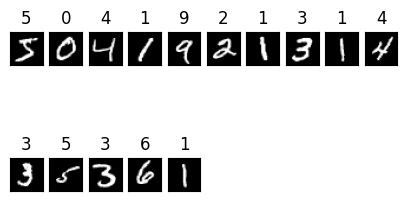

In [ ]:
fig=plt.figure(figsize=(5,3))
for i in range(15):
  ax=fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(x_train[i]),cmap='gray')
  ax.set_title(y_train[i])

In [ ]:
img_shape=x_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=img_shape))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 48)          0         
 ng2D)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 5, 5, 48)          0         
                                                                 
 flatten_5 (Flatten)         (None, 1200)             

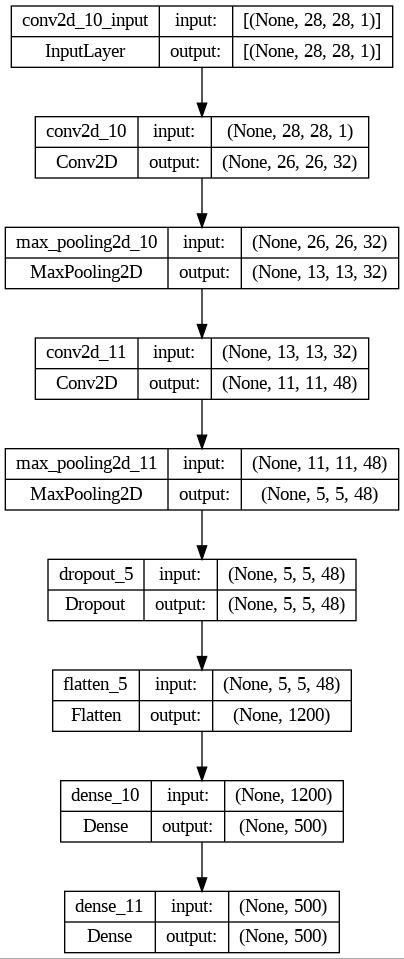

In [ ]:
plot_model(model,'model.jpg',show_shapes=True)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
x=model.fit(x_train,y_train,epochs=10,batch_size=128,verbose=2,validation_split=0.1)

Epoch 1/10
422/422 - 39s - loss: 0.2026 - accuracy: 0.9414 - val_loss: 0.0556 - val_accuracy: 0.9833 - 39s/epoch - 93ms/step
Epoch 2/10
422/422 - 38s - loss: 0.0994 - accuracy: 0.9692 - val_loss: 0.0410 - val_accuracy: 0.9873 - 38s/epoch - 89ms/step
Epoch 3/10
422/422 - 39s - loss: 0.0731 - accuracy: 0.9773 - val_loss: 0.0410 - val_accuracy: 0.9885 - 39s/epoch - 92ms/step
Epoch 4/10
422/422 - 38s - loss: 0.0630 - accuracy: 0.9802 - val_loss: 0.0323 - val_accuracy: 0.9902 - 38s/epoch - 90ms/step
Epoch 5/10
422/422 - 36s - loss: 0.0551 - accuracy: 0.9823 - val_loss: 0.0305 - val_accuracy: 0.9925 - 36s/epoch - 86ms/step
Epoch 6/10
422/422 - 39s - loss: 0.0495 - accuracy: 0.9842 - val_loss: 0.0427 - val_accuracy: 0.9887 - 39s/epoch - 92ms/step
Epoch 7/10
422/422 - 37s - loss: 0.0477 - accuracy: 0.9842 - val_loss: 0.0341 - val_accuracy: 0.9910 - 37s/epoch - 89ms/step
Epoch 8/10
422/422 - 38s - loss: 0.0426 - accuracy: 0.9866 - val_loss: 0.0334 - val_accuracy: 0.9910 - 38s/epoch - 90ms/step


In [ ]:
loss,accuracy=model.evaluate(x_test,y_test,verbose=0)
print(f'Accuracy:{accuracy*100}')

Accuracy:98.989999294281


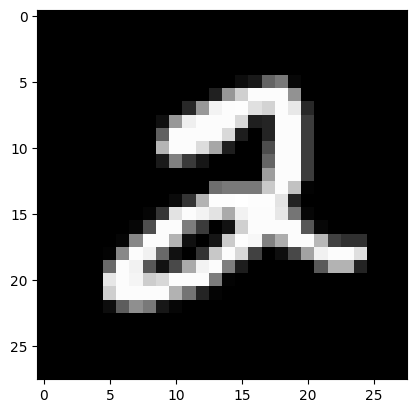

In [ ]:
image=x_train[5]
plt.imshow(np.squeeze(image),cmap='gray')
plt.show()

In [ ]:
image=image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
p=model.predict([image])
print('Predicted:{}'.format(argmax(p)))

1/1 [==============================] - 0s 37ms/step
Predicted:2
